In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.style.use('./figuras.mplstyle')

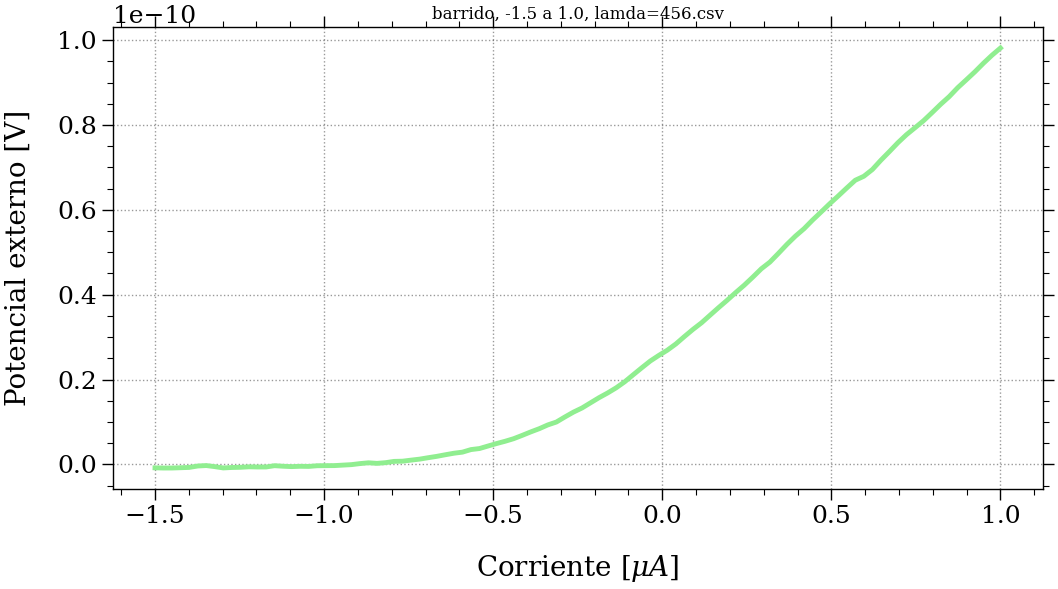

In [4]:
nombre = f'barrido, -1.5 a 1.0, lamda=456'
df = pd.read_csv(f'./Mediciones Dia 2/{nombre}.csv')

V_ret = df['Potencial Retardador'].values
I = df['Corriente'].values
fase = df['Desfasaje'].values
escala_temp = df['EscTemporal'].values
escala_amp = df['EscAmplitud'].values

fig, ax = plt.subplots()

ax.plot(V_ret,I)
ax.set_title(f'barrido, -1.5 a 1.0, lamda=456.csv')
ax.set_xlabel(r'Corriente [$\mu A$]')
ax.set_ylabel(r'Potencial externo [V]')
plt.show()

fig.savefig(rf'./Figuras/Mediciones dia 2/{nombre}.png',dpi = 800,bbox_inches="tight")

El indice es 20
El indice para I = 0.4 es 40
background_current = -5.97e-13


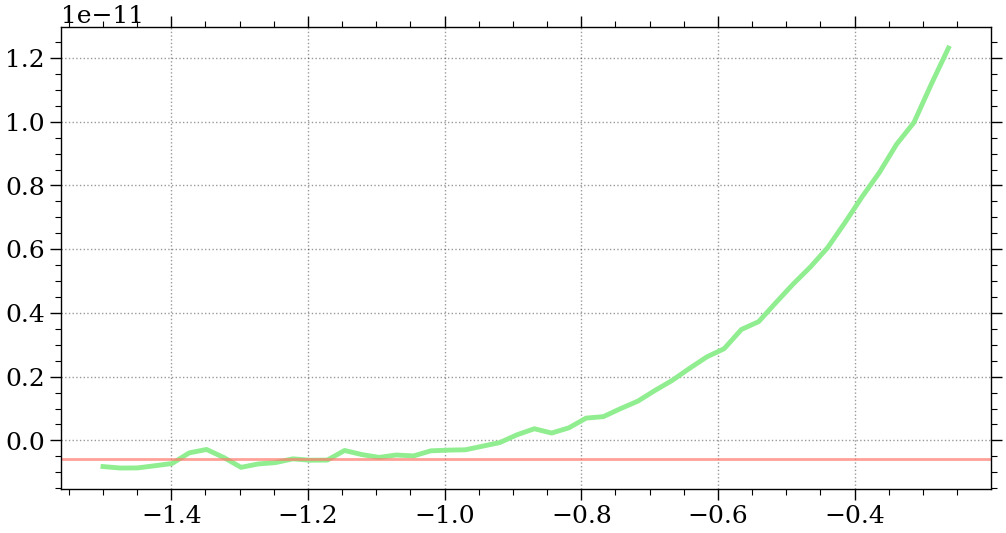

In [119]:
# print(len(I))
new_I = I[0:50]
new_V = V_ret[0:50]


for i in range(len(new_V)): #20
    if new_V[i] > -1   and new_V[i-1] < -1:
        print(f'El indice es {i}')

for i in range(len(I)): #20
    if I[i] > 0.45e-11   and I[i-1] < 0.45e-11:
        print(f'El indice para I = 0.4 es {i}')    
 

background_current = np.mean(new_I[0:20])
print(f'background_current = {background_current:.02e}')
fig, ax = plt.subplots()

ax.plot(new_V,new_I)
ax.axhline(background_current, alpha = 0.7, color = 'C3', linewidth = 2)

El indice es 28
El indice es 29
El indice es 30
El indice es 31
El indice es 32
El indice es 33
El indice es 34
El indice es 35
El indice es 36
El indice es 37
El indice es 38
El indice es 39
El indice es 40
El indice es 41
El indice es 42
El indice es 43
El indice es 44
El indice es 45
El indice es 46
El indice es 47
El indice es 48
El indice es 49


Text(0.413, 0.5, 'v0 $\\approx $ -0.79')

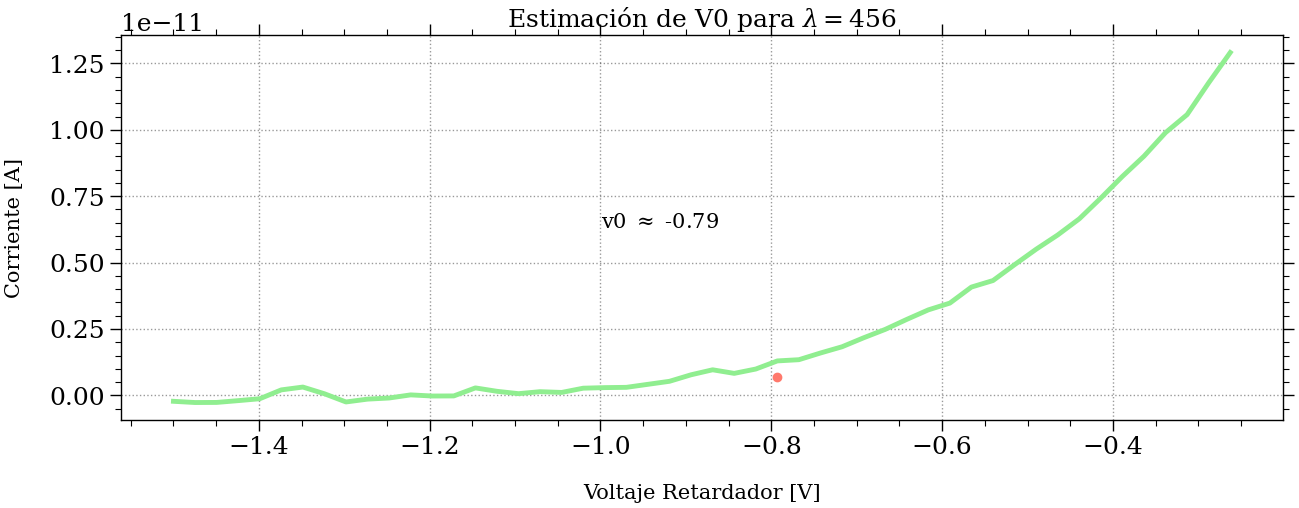

In [ ]:
indice = []
for i in range(len(new_I)): #20
    if abs(((new_I[i] - background_current)/background_current)) > 2: 
        print(f'El indice es {i}')
        indice.append(i)
#  and (new_I[i-1] - background_current) < 0.05e-11:
# print(((new_I - background_current)/background_current))
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(new_V,new_I-background_current)
ax.scatter(new_V[indice[0]],new_I[indice[0]],color = 'C3')
ax.set_title(f'Estimación de V0 para $\lambda = 456$',size = 18)
ax.set_ylabel(f'Corriente [A]',size = 15)
ax.set_xlabel(f'Voltaje Retardador [V]',size = 15)
string = 'string'
ax.annotate(rf'v0 $\approx $ {new_V[indice[0]]:.2f}',(0.413,0.5), xycoords='axes fraction',size = 15)
#rf'v0 $\approx $ {new_V[indice[0]]:.2e}'